In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

De data inlezen

In [294]:
df = pd.read_csv('data/competition-train.csv')
df.set_index("Individu-ID")
df.head()

,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
0,#203910,V,39,1,30,62,-,-,-,-,?,122.5,80.0,18,105,?,CHD-
1,#248527,M,60,4,0,39,-,-,-,-,250,133.0,89.5,27,90,?,CHD-
2,#302622,M,42,2,0,41,-,-,-,-,274,121.0,61.5,25,80,76,CHD-
3,#142075,M,41,1,20,68,-,-,-,-,234,103.0,71.0,21,68,82,CHD+
4,#162498,V,50,3,0,38,-,-,-,-,309,136.0,90.0,26,70,75,CHD-


Wat is de classificatie?

In [293]:
df["prognose10jaar"].unique().tolist()

['CHD-', 'CHD+']

Wat het exact inhoudt, mag joost weten.

coronary heart disease.
Dus ze hebben gekeken na 10 jaar op ze het hebben gekregen ja of nee.

checken op nan en null aanwezige data.

In [295]:
df_prognose = df

In [255]:
df_prognose.shape

(3240, 17)

In [256]:
df_prognose.dtypes

Individu-ID            object
geslacht               object
leeftijd                int64
opleidingsniveau       object
cigaretten_per_dag     object
slaapscore              int64
hypertensie            object
hartinfarct            object
diabetes               object
nierziekte             object
cholesterol            object
bovendruk             float64
onderdruk             float64
BMI                    object
hartslag               object
glucose                object
prognose10jaar         object
dtype: object

Combinatie van nominaal en numerieke waarde.

In [257]:
df_prognose.describe()

,leeftijd,slaapscore,bovendruk,onderdruk
count,3240.000000,3240.000000,3240.000000,3240.000000
mean,49.517284,55.410802,132.040895,82.816049
std,8.787376,18.015912,21.868117,11.920207
min,29.000000,4.000000,83.500000,48.000000
25%,42.000000,42.000000,117.000000,74.500000
50%,49.000000,56.000000,128.000000,82.000000
75%,56.000000,69.000000,143.500000,89.000000
max,71.000000,97.000000,295.000000,142.500000


Waarden lopen veel uiteen

In [258]:
pd.DataFrame({"isna" : df_prognose.isna().sum(),
                    "isnull" : df_prognose.isnull().sum()})

,isna,isnull
Individu-ID,0,0
geslacht,0,0
leeftijd,0,0
opleidingsniveau,0,0
cigaretten_per_dag,0,0
slaapscore,0,0
hypertensie,0,0
hartinfarct,0,0
diabetes,0,0
nierziekte,0,0


Er zijn geen NA en NULL aanwezig. Maar er zijn wel duidelijk op plekken een vraagteken aanwezig.

In [259]:
result_df = pd.DataFrame()

for col in df_prognose:
    unique_values = pd.Series(df_prognose[col].unique(), name=col)
    result_df = pd.concat([result_df, unique_values], axis=1)

result_df.head(10)

,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
0,#203910,V,39.0,1,30,62.0,-,-,-,-,?,122.5,80.0,18,105,?,CHD-
1,#248527,M,60.0,4,0,39.0,+,+,+,+,250,133.0,89.5,27,90,76,CHD+
2,#302622,NaN,42.0,2,20,41.0,NaN,NaN,NaN,?,274,121.0,61.5,25,80,82,NaN
3,#142075,NaN,41.0,3,9,68.0,NaN,NaN,NaN,NaN,234,103.0,71.0,21,68,75,NaN
4,#162498,NaN,50.0,?,3,38.0,NaN,NaN,NaN,NaN,309,136.0,90.0,26,70,87,NaN
5,#206831,NaN,54.0,NaN,40,54.0,NaN,NaN,NaN,NaN,214,147.0,74.0,24,96,68,NaN
6,#293943,NaN,44.0,NaN,15,37.0,NaN,NaN,NaN,NaN,242,118.0,72.0,16,60,73,NaN
7,#183217,NaN,37.0,NaN,5,65.0,NaN,NaN,NaN,NaN,213,110.0,75.0,23,58,72,NaN
8,#299552,NaN,57.0,NaN,19,57.0,NaN,NaN,NaN,NaN,200,100.0,96.0,39,77,71,NaN
9,#328144,NaN,51.0,NaN,1,79.0,NaN,NaN,NaN,NaN,246,161.0,94.0,22,122,70,NaN


Waar een vraagteken aanwezig is. En kolommen die een object als variable hebben maar een int zijn.

In [260]:
d = []
for vraag in list(df_prognose.columns):
    counted = df_prognose[df_prognose[vraag] == "?"]
    d.append(len(counted))

pd.DataFrame(d, index=list(df_prognose.columns), columns=["aantal vraagtekens"])

,aantal vraagtekens
Individu-ID,0
geslacht,0
leeftijd,0
opleidingsniveau,77
cigaretten_per_dag,21
slaapscore,0
hypertensie,0
hartinfarct,0
diabetes,0
nierziekte,8


drop vraagteken

In [261]:
vraagteken = ["opleidingsniveau", "nierziekte", "cholesterol", "glucose", "BMI", "hartslag", "cigaretten_per_dag"]

In [296]:
for vraag in vraagteken:
    df_prognose = df_prognose.drop(df_prognose[df_prognose[vraag] == "?"].index)

To int

In [297]:
to_int = ["opleidingsniveau", "cholesterol", "glucose", "BMI", "hartslag", "cigaretten_per_dag", "slaapscore", "onderdruk", "bovendruk"]
df_prognose[to_int] = df_prognose[to_int].astype(int)

df_prognose.dtypes

Individu-ID           object
geslacht              object
leeftijd               int64
opleidingsniveau       int64
cigaretten_per_dag     int64
slaapscore             int64
hypertensie           object
hartinfarct           object
diabetes              object
nierziekte            object
cholesterol            int64
bovendruk              int64
onderdruk              int64
BMI                    int64
hartslag               int64
glucose                int64
prognose10jaar        object
dtype: object

Kijken naar de verdeling van alle kollommen. Eerst alleen naar de numerieke, en kijken of een log of wortel een betere verdeling kan vormen.

In [264]:
int_value = ["leeftijd", "opleidingsniveau", "slaapscore", "bovendruk", "onderdruk", "glucose", "cigaretten_per_dag", "hartslag", "BMI" ]

array([[<Axes: title={'center': 'leeftijd'}>,
        <Axes: title={'center': 'opleidingsniveau'}>,
        <Axes: title={'center': 'cigaretten_per_dag'}>],
       [<Axes: title={'center': 'slaapscore'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'bovendruk'}>],
       [<Axes: title={'center': 'onderdruk'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'hartslag'}>],
       [<Axes: title={'center': 'glucose'}>, <Axes: >, <Axes: >]],
      dtype=object)

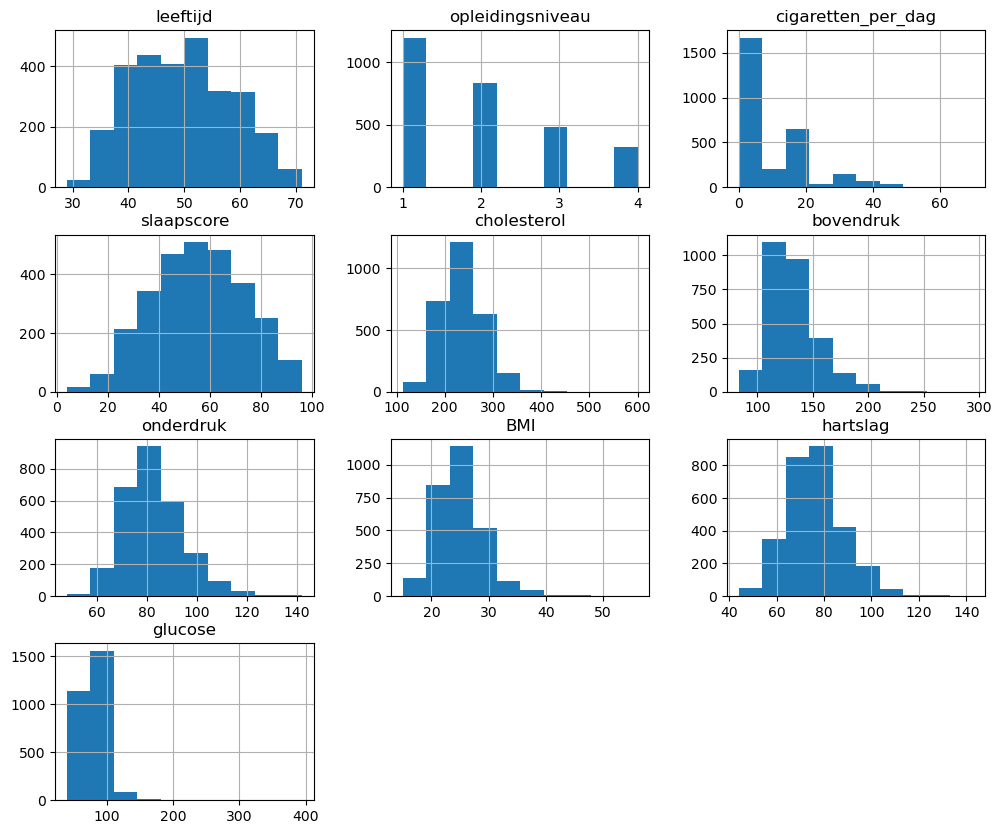

In [265]:
df_prognose.hist(figsize=(12,10))

In [266]:
df_log = pd.DataFrame()
for col in int_value[:7]:
    new_attribute = "log(" + col + ")"
    df_log[new_attribute] = np.log(df_prognose[col])

/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Op BMI en hartslag kan geen log transformatie

ValueError: supplied range of [-inf, 4.2484952420493585] is not finite

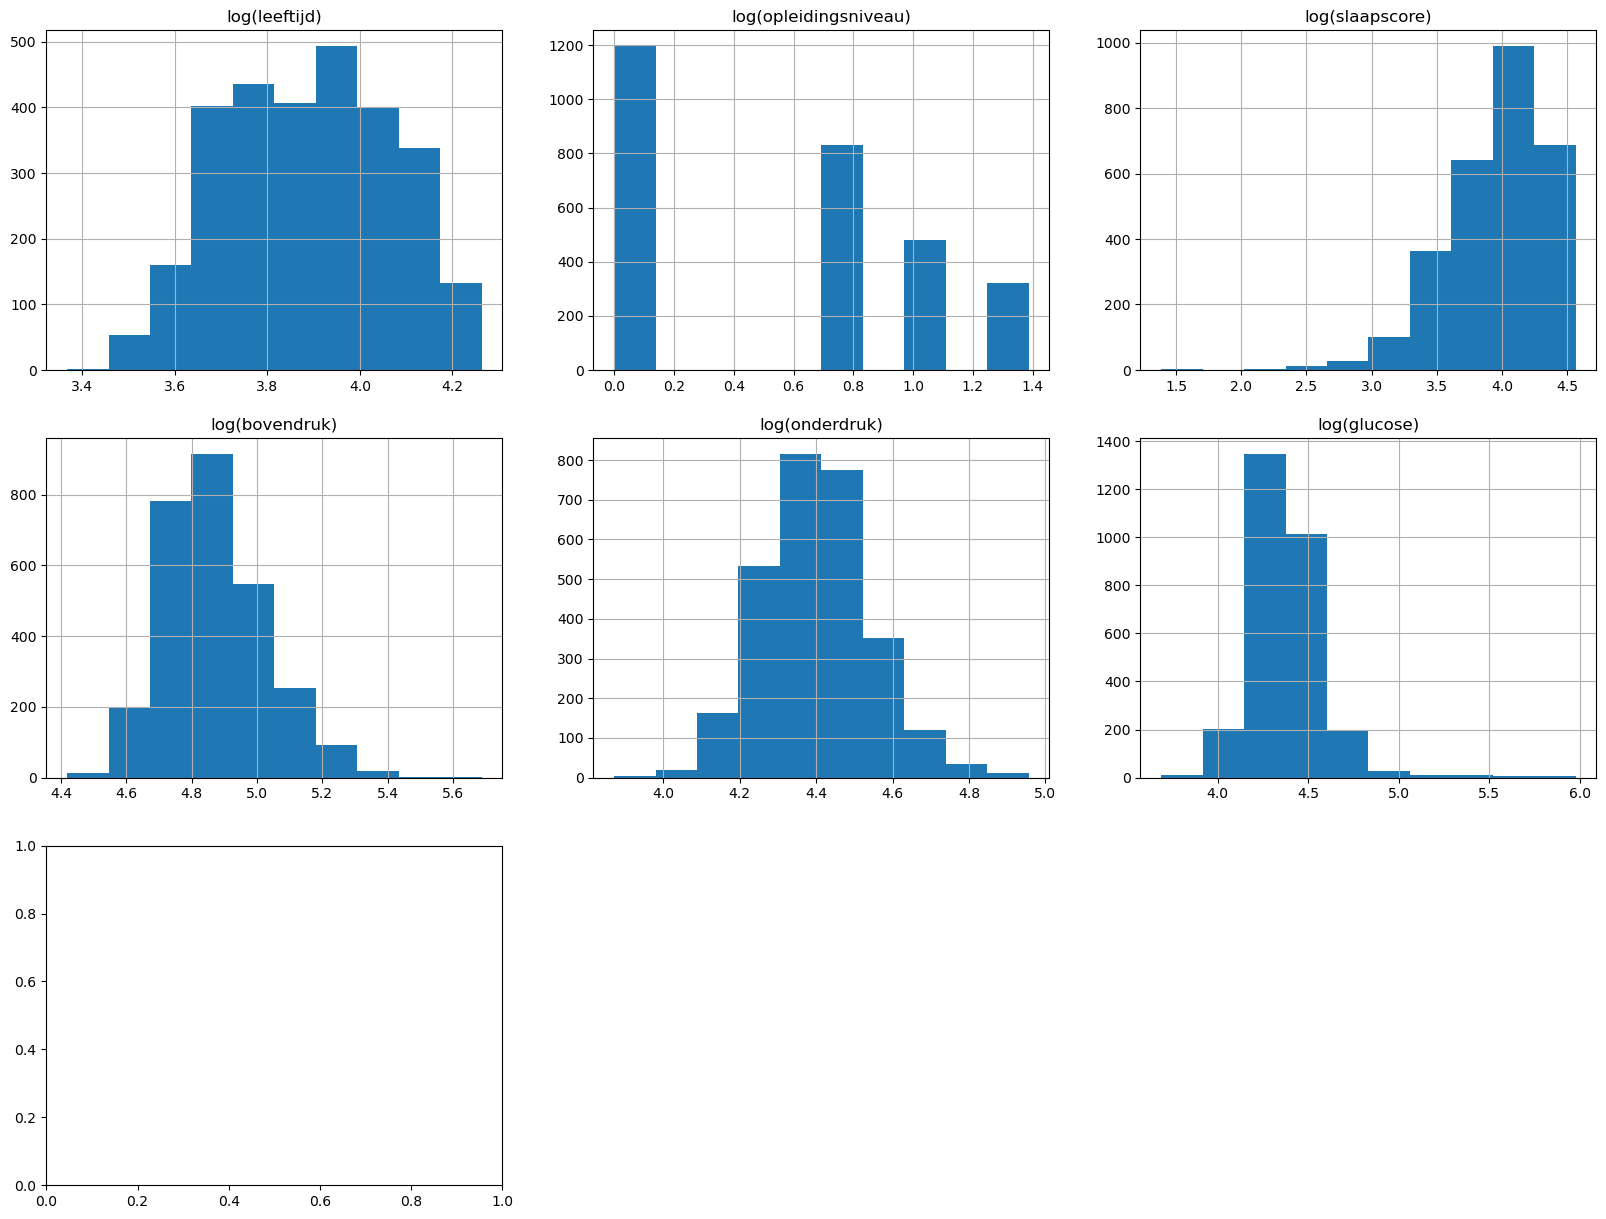

In [267]:
df_log.hist(figsize=(20,15))

In [268]:
dfsqrt = pd.DataFrame()
for col in int_value:
    new_attribute = "sqrt(" + col + ")"
    dfsqrt[new_attribute] = np.sqrt(df_prognose[col])


array([[<Axes: title={'center': 'sqrt(leeftijd)'}>,
        <Axes: title={'center': 'sqrt(opleidingsniveau)'}>,
        <Axes: title={'center': 'sqrt(slaapscore)'}>],
       [<Axes: title={'center': 'sqrt(bovendruk)'}>,
        <Axes: title={'center': 'sqrt(onderdruk)'}>,
        <Axes: title={'center': 'sqrt(glucose)'}>],
       [<Axes: title={'center': 'sqrt(cigaretten_per_dag)'}>,
        <Axes: title={'center': 'sqrt(hartslag)'}>,
        <Axes: title={'center': 'sqrt(BMI)'}>]], dtype=object)

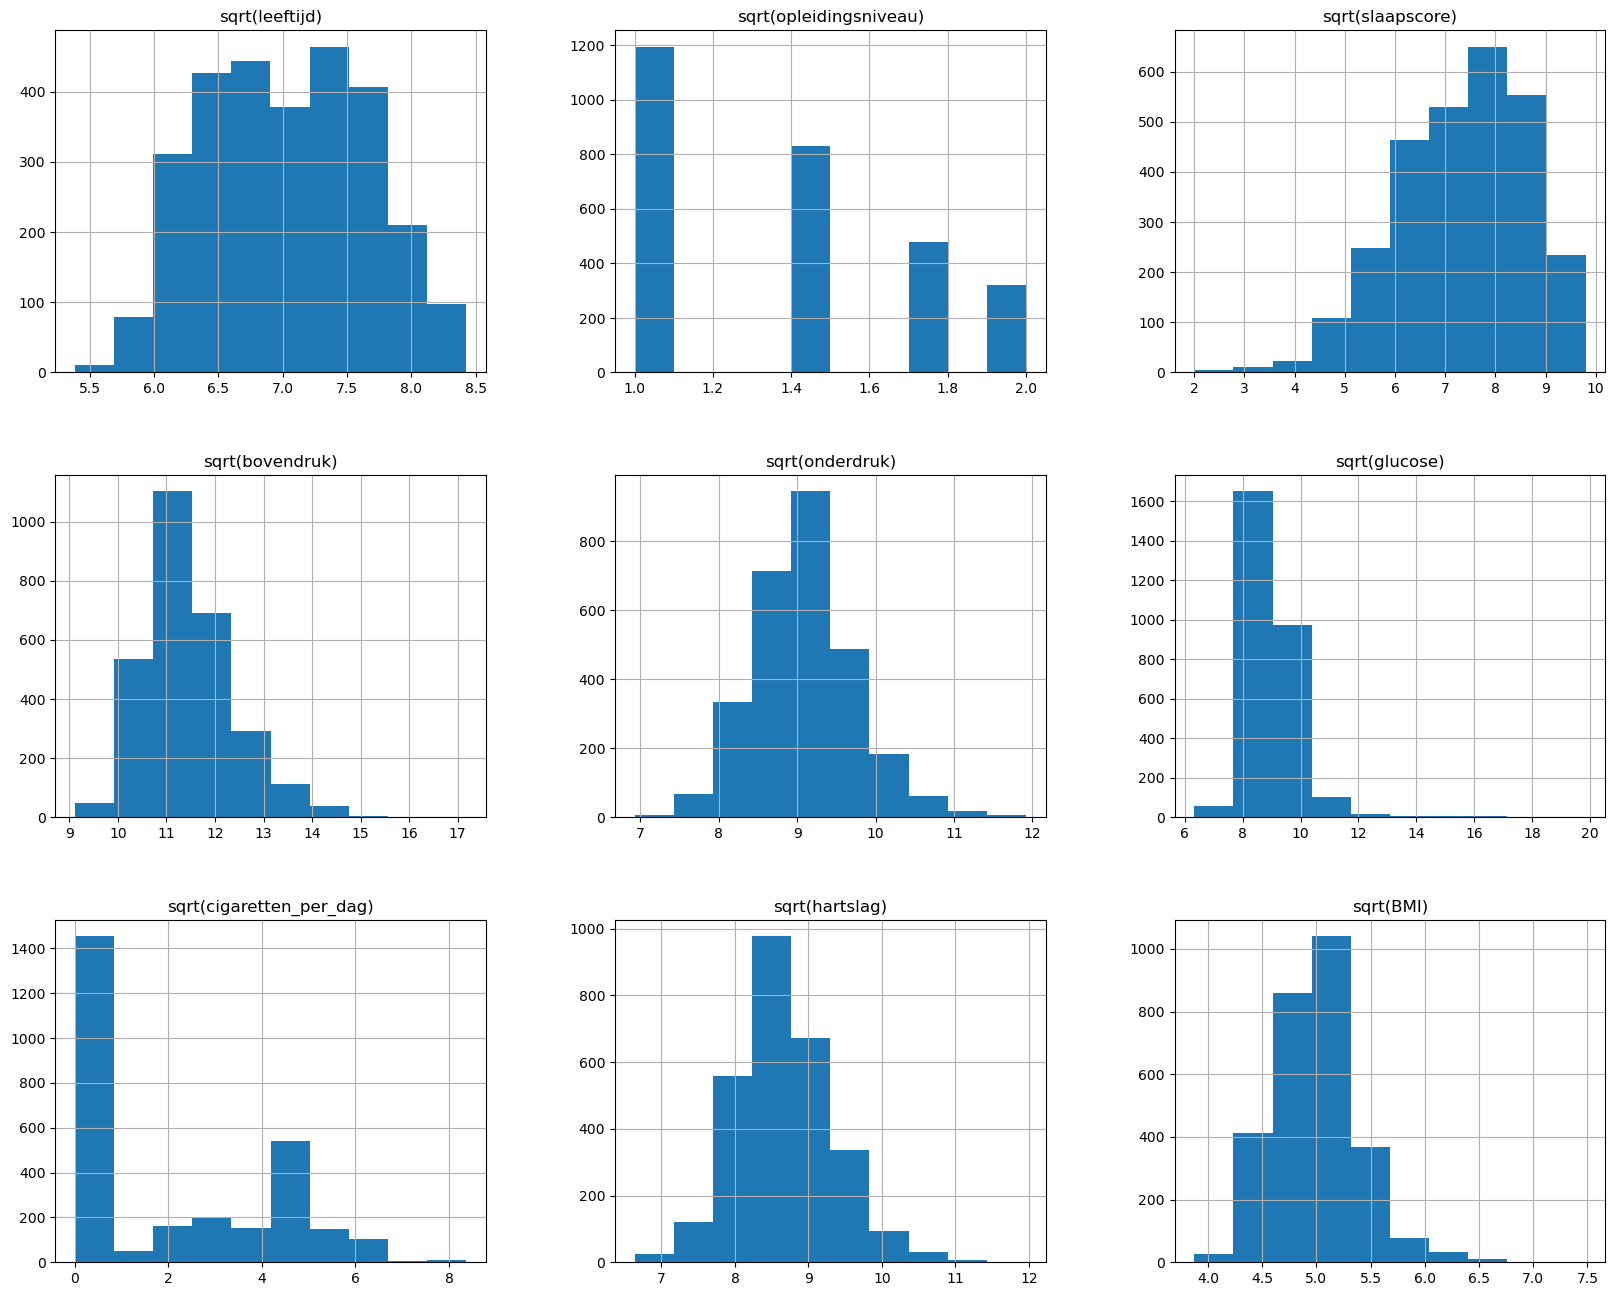

In [269]:
dfsqrt.hist(figsize=(20, 16))

Kijkende naar de bovenstaande grafieken, gaan we de log houden van glucose en  onderdruk. En de wortel van BMI.

In [290]:
# edit = ["glucose"]

# for edi in edit:
#     new_attribute = "log(" + edi + ")"
#     df_prognose[new_attribute] = np.log(df_prognose[edi])
#     df_prognose.drop(edi, axis=1, inplace=True)

edit= ["BMI"]
for edi in edit:
    new_attribute = "sqrt(" + edi + ")"
    df_prognose[new_attribute] = np.sqrt(df_prognose[edi])
    df_prognose.drop(edi, axis=1, inplace=True)
    

KeyError: 'BMI'

Kijken naar de verdeling van de nominale waardes.

In [271]:
df_prognose

,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,hartslag,prognose10jaar,log(glucose),sqrt(BMI)
2,#302622,M,42,2,0,41,-,-,-,-,274,121,61,80,CHD-,4.330733,5.000000
3,#142075,M,41,1,20,68,-,-,-,-,234,103,71,68,CHD+,4.406719,4.582576
4,#162498,V,50,3,0,38,-,-,-,-,309,136,90,70,CHD-,4.317488,5.099020
5,#206831,M,54,1,20,54,+,-,-,-,214,147,74,96,CHD-,4.465908,4.898979
7,#183217,V,37,2,0,37,-,-,-,-,242,110,75,58,CHD-,4.219508,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,#170800,V,38,1,30,71,-,-,-,-,164,113,68,70,CHD-,4.317488,5.000000
3236,#313110,V,32,3,15,64,-,-,-,-,199,116,81,75,CHD-,4.532599,4.582576
3237,#226915,V,46,3,0,18,+,-,-,-,237,196,120,58,CHD+,4.094345,5.567764
3238,#213677,V,58,1,0,78,-,-,-,-,205,142,74,85,CHD-,4.418841,5.000000


In [272]:
str_value = ["geslacht", "hypertensie", "hartinfarct", "diabetes", "nierziekte"]

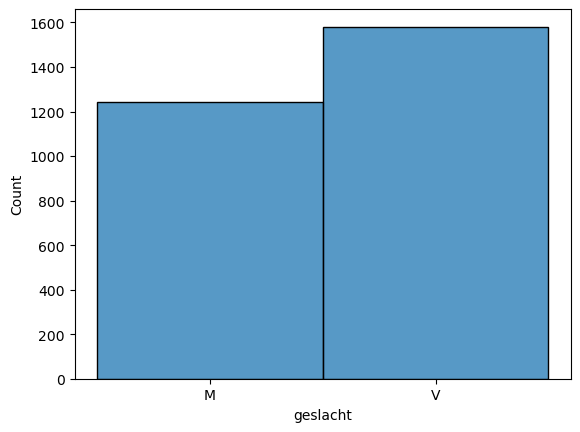

In [273]:
sns.histplot(df_prognose, x=str_value[0]);


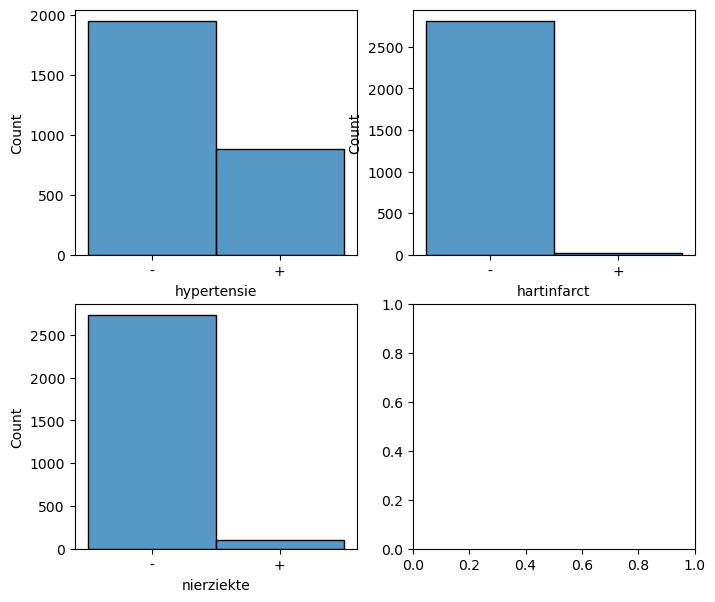

In [274]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7));

sns.histplot(df_prognose, x=str_value[1], ax=axes[0,0]);
sns.histplot(df_prognose, x=str_value[2], ax=axes[0,1]);
sns.histplot(df_prognose, x=str_value[4], ax=axes[1,0]);

Hier zie je dat er grootte verschillen zijn de aantallen van mensen met bepaalde ziekten.

De verdeling van de classificatie

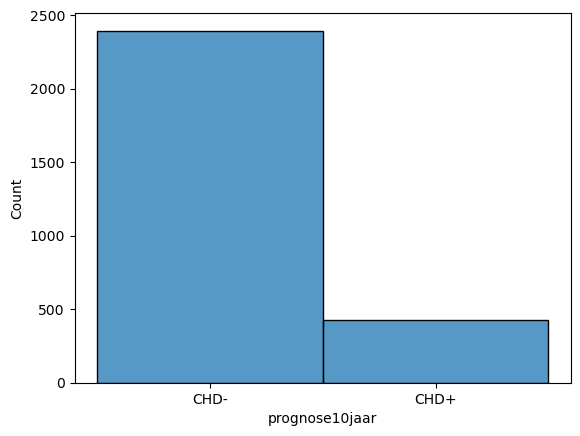

In [275]:
sns.histplot(df_prognose, x="prognose10jaar");

dataframe voor het verwijderen van de data wat we hebben gedaan

In [276]:
df.groupby("prognose10jaar").count()

,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose
prognose10jaar,,,,,,,,,,,,,,,,
CHD+,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485
CHD-,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755


dataframe na het verwijderen van de data wat we hebben gedaan

In [277]:
df_prognose.groupby("prognose10jaar").count()


,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,hartslag,log(glucose),sqrt(BMI)
prognose10jaar,,,,,,,,,,,,,,,,
CHD+,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430
CHD-,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396


We kiezen er dus bewust voor om 50 personen uit de CHD+ te verwijderen.
Ja daar mag smote over heen gegooid worden.

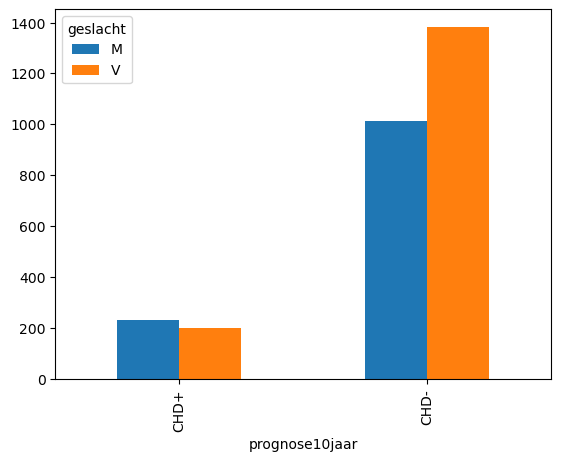

In [279]:
df_bar = df_prognose.groupby(["prognose10jaar", "geslacht"]).size()
df_bar = df_bar.unstack()
df_bar.plot(kind="bar");

In [ ]:
sns.pairplot(df_prognose, hue="geslacht", plot_kws={'alpha': 0.1});


best wel overlappend van mannen en vrouwen dus een geslacht zou geen grootte verschillen er in brengen.

In [298]:
df_meh = df_prognose
df_meh = df_meh.replace("CHD+", 1.0)
df_meh = df_meh.replace("CHD-", 0.0)
df_meh = df_meh.replace("M", 0.0)
df_meh = df_meh.replace("V", 1.0)
df_meh = df_meh.replace("-", 0.0)
df_meh = df_meh.replace("+", 1.0)


/tmp/ipykernel_1091016/1051799176.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meh = df_meh.replace("CHD-", 0.0)
/tmp/ipykernel_1091016/1051799176.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meh = df_meh.replace("V", 1.0)
/tmp/ipykernel_1091016/1051799176.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [89]:
int_value 

['leeftijd',
 'opleidingsniveau',
 'slaapscore',
 'cholesterol',
 'bovendruk',
 'onderdruk',
 'glucose',
 'cigaretten_per_dag',
 'hartslag',
 'BMI']

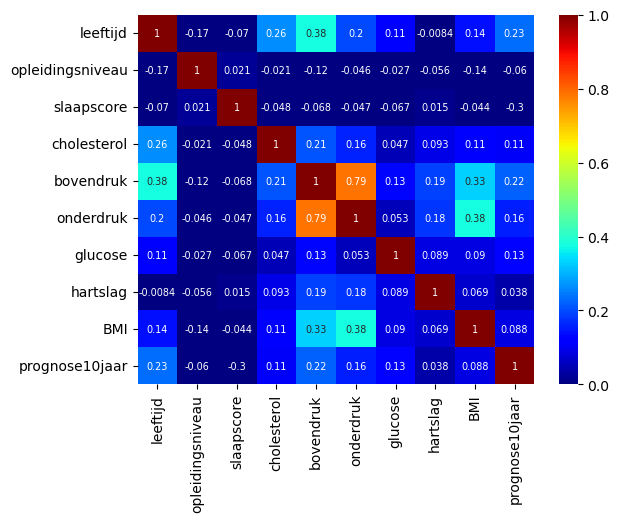

In [309]:
int_value = ["leeftijd", "opleidingsniveau", "slaapscore", "cholesterol", "bovendruk", "onderdruk", "glucose", "hartslag", "BMI", "prognose10jaar"]
axs = sns.heatmap(df_meh[int_value].corr(), annot=True, annot_kws={"fontsize": "x-small"}, cmap="jet", vmin=0.0, vmax=1.0)

In [ ]:
sns.pairplot(df_prognose, hue="prognose10jaar", plot_kws={'alpha': 0.1});

Machine learning

In [299]:
df_meh.drop("Individu-ID", axis=1, inplace=True)

In [300]:

X = df_meh.iloc[:,:-1].to_numpy()
y= df_meh["prognose10jaar"].to_numpy()

In [175]:
X.shape, y.shape, X.dtype, y.dtype
# X.astype(float)

((2826, 15), (2826,), dtype('float64'), dtype('float64'))

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [302]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [180]:
X_train_smote.shape, y_train_smote.shape

((3228, 15), (3228,))

In [246]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


models = [
    DummyClassifier,
    DecisionTreeClassifier,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    RidgeClassifier,
    LogisticRegression,
    QuadraticDiscriminantAnalysis,
    LinearDiscriminantAnalysis,
    AdaBoostClassifier,
    SVC]

In [303]:
from sklearn.model_selection import cross_validate

metric_scores = {}
for model in models:
    scores = cross_validate(model(), X_train_smote, y_train_smote, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores
    
pd.DataFrame(metric_scores).T

/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/utils/extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



,fit_time,score_time,test_score,train_score
DummyClassifier,0.000385,0.000441,0.499690,0.500077
DecisionTreeClassifier,0.015001,0.000896,0.840788,1.000000
GaussianNB,0.000867,0.000462,0.640945,0.647460
KNeighborsClassifier,0.002414,0.023055,0.829934,0.880344
RandomForestClassifier,0.324914,0.007140,0.923191,1.000000
RidgeClassifier,0.001957,0.000493,0.733273,0.734743
LogisticRegression,0.047417,0.000874,0.736063,0.737066
QuadraticDiscriminantAnalysis,0.004344,0.000970,0.662012,0.679525
LinearDiscriminantAnalysis,0.007826,0.000829,0.732344,0.734898
AdaBoostClassifier,0.163409,0.005355,0.846071,0.870897


In [304]:
from sklearn.feature_selection import SelectKBest
temp = df_meh.drop("prognose10jaar", axis=1)

selector = SelectKBest(k=15).fit(X_train_smote, y_train_smote)

pd.DataFrame({"Attribute": temp.columns, "Score": selector.scores_}).sort_values("Score", ascending=False).set_index("Attribute")

,Score
Attribute,
slaapscore,701.147092
leeftijd,414.352821
bovendruk,262.900146
hypertensie,154.885117
onderdruk,135.259929
glucose,56.137399
cholesterol,55.338835
opleidingsniveau,41.952628
hartinfarct,37.542547


In [310]:
metric_scores = {}
k = 15
while k:
    X_select = SelectKBest(k=k).fit_transform(X_train_smote, y_train_smote)
    scores = cross_validate(AdaBoostClassifier(), X_select, y_train_smote, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{k} features"] = scores
    k -= 1

pd.DataFrame(metric_scores).T

/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/homes/lvoshol/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

,fit_time,score_time,test_score,train_score
15 features,0.147831,0.004853,0.846071,0.870897
14 features,0.151596,0.005063,0.845143,0.869891
13 features,0.136818,0.004969,0.845452,0.870510
12 features,0.135419,0.004575,0.847308,0.867025
11 features,0.123474,0.004520,0.850093,0.869736
10 features,0.123176,0.004764,0.850093,0.869736
9 features,0.120058,0.004819,0.825301,0.844797
8 features,0.124159,0.004734,0.821896,0.842784
7 features,0.118878,0.004709,0.764266,0.791900
6 features,0.106625,0.005131,0.769532,0.792054


In [307]:
metric_scores = {}
k = 15

0
while k:
    X_select = SelectKBest(k=k).fit_transform(X_train_smote, y_train_smote)
    scores = cross_validate(KNeighborsClassifier(), X_select, y_train_smote, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{k} features"] = scores
    k -= 1

pd.DataFrame(metric_scores).T

,fit_time,score_time,test_score,train_score
15 features,0.002591,0.026754,0.829934,0.880344
14 features,0.002532,0.020712,0.836129,0.879105
13 features,0.001917,0.019537,0.827764,0.875930
12 features,0.001892,0.019124,0.827764,0.875852
11 features,0.001685,0.018736,0.831171,0.878098
10 features,0.001658,0.018634,0.831171,0.878098
9 features,0.001508,0.018308,0.830242,0.878098
8 features,0.001413,0.018320,0.830242,0.878098
7 features,0.001303,0.019325,0.830860,0.878331
6 features,0.001302,0.017241,0.798329,0.859587


In [ ]:


x = df_prognose[:, :-1].to_numpy()
y= df_prognose[:, -1].to_numpy()

my_model = 

mymodel.fit(x,y)


prediction

In [ ]:
X = df_prognose[:, :-1].to_numpy()
yhat = my_model.predict(X)

maak package

In [ ]:
import pickle

with open("model/model.pkl", "wb") as file:
    pickle.dump(my_model, file)

In [ ]:
with open("model/model.plk", "rb") as file:
    new_model = pickle.load(file)

gebruik package

In [ ]:
from model.meuk import Ourmodel

package_model = Ourmodel()

predi = package_model.predict("../competition-train-noclass.csv")
predi

of deze :)

In [ ]:
from model import model_factory
package_model = model_factory()

predi = package_model.predict("../competition-train-noclass.csv")
predi